# Household eletric power consumption<br>
This project was made by **Ivan Garcia Guimarães**

## Introduction<br>
This is a challenge propoused by Grupo Liberty Brasil. In this chanllenge i will have 2 hours timer to develop a full exploratory analysis and a machine learn model to predict the eletricity consumption shown in this dataset. 

## Data<br>
This data comes from Irvine UCI repository at: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption<br> 
This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license.



In [1]:
#Import libraries
import pandas as pd
import seaborn as sb
import matplotlib as plt
import holidays
from sklearn.preprocessing import LabelEncoder

In [2]:
#Add files path
path = ('C:/_Projetos/Eletricity_Consumption/')

In [3]:
#Read CSV
df_power = pd.read_csv(path+'household_power_consumption.txt', sep=';', encoding='utf-8')

C:\Users\Ivan_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Now we will look at our data for the first time and see what kind of information we have.

In [4]:
df_power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Since our data came from a text file, all data are as object types so in order to give a better look and to work later on, we will change those types to better suit us. But first we will try to deal with non valuable values.

In [6]:
df_power.loc[df_power['Global_active_power']=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


Those rows are all empty values so it will not be valuable information. Our dataset is quite big so i belive those rows will not be a problem for us if we remove it.

In [7]:
df_power = df_power.loc[df_power['Global_active_power']!='?'].reset_index(drop=True)

In [8]:
#Change Data types
df_power['Date'] = pd.DatetimeIndex(df_power['Date'])
df_power['Time'] = pd.DatetimeIndex(df_power['Time']).time
df_power['Global_active_power'] = df_power['Global_active_power'].astype('float32')
df_power['Global_reactive_power'] = df_power['Global_reactive_power'].astype('float32')
df_power['Voltage'] = df_power['Voltage'].astype('float32')
df_power['Global_intensity'] = df_power['Global_intensity'].astype('float32')
df_power['Sub_metering_1'] = df_power['Sub_metering_1'].astype('float32')
df_power['Sub_metering_2'] = df_power['Sub_metering_2'].astype('float32')
df_power['Sub_metering_3'] = df_power['Sub_metering_3'].astype('float32')

Now we had changed all the types, we will give a look if the changes are as we expected. A short observation, i choose the 32bits for most of the types because it makes the dataset lighter reducing the usage of memory in future steps and the quantanty of digits are small so it suits perfectly in our case. 

In [9]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float32       
 3   Global_reactive_power  float32       
 4   Voltage                float32       
 5   Global_intensity       float32       
 6   Sub_metering_1         float32       
 7   Sub_metering_2         float32       
 8   Sub_metering_3         float32       
dtypes: datetime64[ns](1), float32(7), object(1)
memory usage: 86.0+ MB


In [10]:
df_power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I want to see the range of dates we are working with and we could see previously the range of the other columns.

In [11]:
#Variables of Max/Min
date_max = df_power['Date'].max()
date_min = df_power['Date'].min()
hour_max = df_power['Time'].max()
hour_min = df_power['Time'].min()

In [12]:
print('Date Max: {}/ Date Min: {}'.format(date_max,date_min))
print('Hour Max: {}/ Hour Min: {}'.format(hour_max,hour_min))

Date Max: 2010-12-11 00:00:00/ Date Min: 2006-12-16 00:00:00
Hour Max: 23:59:00/ Hour Min: 00:00:00


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>],
       [<AxesSubplot:title={'center':'Voltage'}>,
        <AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Sub_metering_1'}>],
       [<AxesSubplot:title={'center':'Sub_metering_2'}>,
        <AxesSubplot:title={'center':'Sub_metering_3'}>, <AxesSubplot:>]],
      dtype=object)

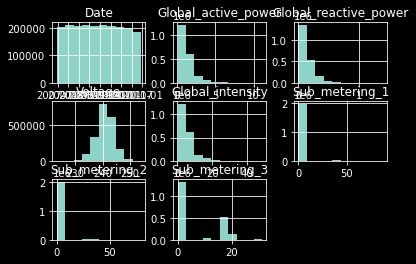

In [13]:
df_power.hist()

As seem before, we ploted few grapghs in order to give a quickly look at the distributions we have in our data, Global_active_power,Global_reactive_power and Global_intensity are right-skewed distributed on the other hand Voltage is normal distributed. Sub_metering_1,2,3 are a bit odd but we could say it is more or less right-skewed distributed as well but probably there are outliers or any type of non-linear correlation.

Now we have an idea of our data we are working with, we can go deeper in our analisys. First of all i want to find if there is a time of the day people consumes more energy, secondly what are the dayly comsumption per day of the week and the last is if there is any increase in consumption during holydays.

In order to awnser the first question, we will split the time into 4 groups night,morning,afternoon and evening since work with full 24hrs is a bit hectic.

In [14]:
#Create new column and Transform data into groups
df_power['Period'] = df_power['Time'].apply(lambda x: str(x).split(':')[0]).astype(int)
df_power.loc[df_power['Period'].isin(range(0,6)),'Period'] = 'Night'
df_power.loc[df_power['Period'].isin(range(6,13)),'Period'] = 'Morning'
df_power.loc[df_power['Period'].isin(range(13,19)),'Period'] = 'Afternoon'
df_power.loc[df_power['Period'].isin(range(19,25)),'Period'] = 'Evening'

<AxesSubplot:xlabel='Period', ylabel='Global_active_power'>

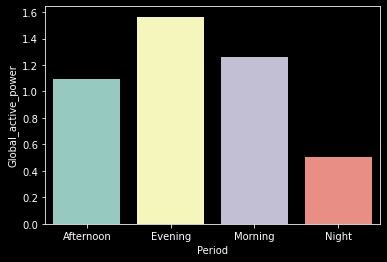

In [15]:
#Barplot
df_period = df_power.groupby(['Period']).agg({'Global_active_power':'mean'}).reset_index()
sb.barplot(y=df_period['Global_active_power'],x=df_period['Period'])

As expected, evening is the period people consumes the most because of the lights and probably is the period the hole family is toghether at home on the other hand, at night since people are sleeping they do not consume so much.

In [16]:
#Create new column and rename variables
df_power['Day_of_week'] = pd.DatetimeIndex(df_power['Date']).dayofweek
df_power['Day_of_week'] = df_power['Day_of_week'].replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fry','Sat','Sun'])

<AxesSubplot:xlabel='Day_of_week', ylabel='Global_active_power'>

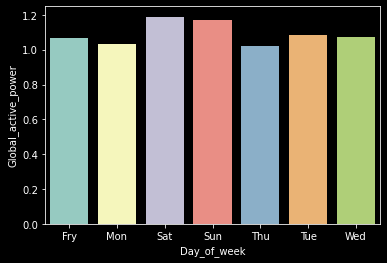

In [17]:
#Barplot
df_period = df_power.groupby(['Day_of_week']).agg({'Global_active_power':'mean'}).reset_index()
sb.barplot(y=df_period['Global_active_power'],x=df_period['Day_of_week'])

it seems during weekends the comsumption increases compared with week days but it is not so much different.

In [18]:
#Create new dataframe with dates and holidays
new_date = []
new_name = []
for date,name in holidays.FR(years=[2006,2007,2008,2009,2010]).items():
    new_date.append(date)
    new_name.append(name)

df_holiday = pd.DataFrame(pd.DatetimeIndex(new_date),columns=['Date'])
df_holiday['Name'] = new_name

In [19]:
#Create new column and Transform data into groups
df_power['Holiday'] = df_power.merge(df_holiday,how='left',on=['Date'])['Name']
df_power.loc[df_power['Holiday'].isna(),'Holiday'] = False
df_power.loc[df_power['Holiday']!=False,'Holiday'] = True

<AxesSubplot:xlabel='Holiday', ylabel='Global_active_power'>

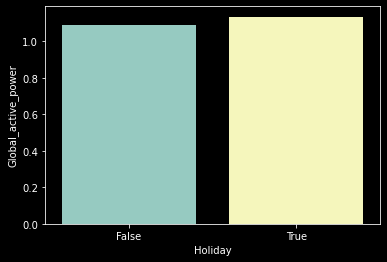

In [20]:
#Barplot
df_period = df_power.groupby(['Holiday']).agg({'Global_active_power':'mean'}).reset_index()
sb.barplot(y=df_period['Global_active_power'],x=df_period['Holiday'])

This one i could not expect, the difference is so low even though there is a slightly difference.

In [21]:
#Encoding labels
le_period = LabelEncoder()
le_period.fit(df_power['Period'])
df_power['Period'] = le_period.transform(df_power['Period'])

#Return Day_of_week as numeric 
df_power['Day_of_week'] = pd.DatetimeIndex(df_power['Date']).dayofweek

#Transform Time in int
df_power['Time'] = df_power['Time'].apply(lambda x: str(x).split(':')[0]).astype(int)

df_power['Holiday'] = df_power['Holiday'].astype('int32')

In [22]:
#Create new date features
df_power['Month'] = pd.DatetimeIndex(df_power['Date']).month
df_power['Week'] = pd.DatetimeIndex(df_power['Date']).weekofyear

<ipython-input-22-f89a9f2248df>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_power['Week'] = pd.DatetimeIndex(df_power['Date']).weekofyear


## Machine Learning<br>
Since our time is running out i will go very quickly by this part, i will give more insights in this process in a section at the end called "Improvements".

In [23]:
#import ML Libraries
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [24]:
#Split data into train and test sets
X = df_power.drop(['Global_active_power','Global_reactive_power','Date'],axis=1)
y = df_power['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

During the feature selection section, i removed features that were directly connected with the target feature or useless infomation

In [25]:
#Fit model no training data
model = XGBRegressor(
    learning_rate = 0.01,
    n_estimators = 500,
    seed = 1,
    gamma = 0.2
)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Those parameters was choosen without any criteria, it was some parameters i usualy see having rasonable results and since i run out of time i simple used those. As said later i will give more idea how i really do this part usually.

In [26]:
#Make predictions for test data
y_pred = model.predict(X_test)

In [27]:
#Validation Metrics
mape = mean_absolute_percentage_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [28]:
#Final ML Results
print('MAPE: {} / MAE: {}'.format(mape,mae))

MAPE: 0.041071608662605286 / MAE: 0.023915810510516167


Those metrics are good for showing to general people since them are self-explanatory. As we can see, the results were realy good but maybe we could had even better results if we had more time and used some technics for improving models.

## Conclusion<br>
We can sum up this project with few information, first of all based on our initial questions we know the period of the day is haighly connected with the consumption of energy, the day of the week as well but the deviation among the days are not so high as the period and last but not least the holiday, it has difference as well but we barely could see the difference.<br><br>
About the machine learning, we could predict the global active power based on the other information given plus few others extracted during our explanatory analys and later. As said it was a short challenge with a timer so it was all i could do in this period but it has way more things we could have done.

## Improvements<br>
During the machine learn step it had many things i did not do but it is important. First of all are the parameters, we could have done a grid search in order to find the best attributes, but it usually takes a while to run so we skipped this step.<br><br>
Second, is the algorithm itself, i choose one of my favorite ones but we could have done a cross-validation to find one that could be better or maybe even faster.<br><br>
Another point is the feature selection, we could had find more hidden information in the dataset or maybe used another kind of transformations, again since i like this method of factorize labels into numbers i used it but we could had used dummy variables as well, my only concern when using dummies is that it increases the time running the model if it has many features already, maybe it could make impossible to run in local machine or just very slow.